# Trabajo Práctico 1 : Propiedades en Venta

### 1. Análisis Exploratorio y Preprocesamiento de Datos

El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

In [185]:
%matplotlib inline
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Obtengo el data frame desde el archivo csv
properati_df = pd.read_csv("Datasets/properati_argentina_2021.csv")

In [159]:
# Filtro para seleccionar las propiedades que son del tipo Casa, PH o Departamento
propery_type_filter = properati_df.property_type.isin(['Casa', 'PH', 'Departamento'])

# Filtro para seleccionar las propiedades localizadas en Capital federal
place_is_caba = properati_df.place_l2 == 'Capital Federal'

# Filtro para seleccionar las propiedades que tienen por operacion la Venta
operation_is_venta = properati_df.operation == 'Venta'

# Filtro para seleccionar las propiedades en dolares
currency_is_usd = properati_df.property_currency == 'USD'

# Aplico los filtros sobre el dataset original
properati_df = properati_df.loc[currency_is_usd & operation_is_venta & place_is_caba & propery_type_filter]

In [160]:
# Renombro la variable place_l3 a barrio
properati_df= properati_df.rename(columns={"place_l3": "barrio"})

In [161]:
# Filtro las columnas que tienen todos sus valores null: "place_l5" y "place_l6", las que son unicas: "operation", "place_l2" y property_currency y las no categoricas property_title
properati_df = properati_df.loc[:, ['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud', 'barrio', 'place_l4','property_type', 'property_rooms', 'property_bedrooms','property_surface_total', 'property_surface_covered', 'property_price', 'property_title']]


In [162]:
# Filtro las filas que tienen barrio null
properati_df = properati_df.loc[properati_df.barrio.notna()]

### Analizo las variables numericas

In [141]:
# Analsis global
properati_df.describe()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,90272,90272,92870,82974,89059,90488,93832
mean,-35,-58,3,2,108,88,226467
std,0,0,1,1,961,993,319050
min,-35,-59,1,-1,10,1,5000
25%,-35,-58,2,1,45,40,95000
50%,-35,-58,3,2,65,57,144000
75%,-35,-58,4,3,104,88,238000
max,-35,-58,40,70,137000,217000,21400000


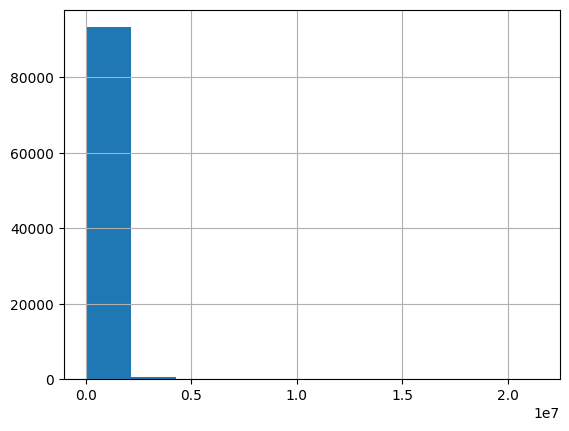

In [153]:
properati_df.property_price.hist(bins=10)
plt.show()


In [183]:
# Busco outliers 
q1 = np.quantile(properati_df.property_price, 0.25)
q3 = np.quantile(properati_df.property_price, 0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 100 * iqr
print(upper)
outliers = properati_df[properati_df.property_price > upper]
outliers.head()


14538000.0


,id,start_date,end_date,created_on,latitud,longitud,barrio,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
60073,uoM9HDKq3jZKQKgHXTIGkg==,2021-01-25,2022-05-13,2021-01-25,-35,-58,Caballito,NaN,Departamento,3,NaN,68,64,21400000,Departamento venta


### <i> Analizo las variables cualitativas </i>

In [108]:
# Analizo Frecuencias de propiedades en barrios
properati_df.barrio.value_counts()

Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas                 1246
Boedo                    1237
Floresta                 1195
Monserrat                1115
Parque Chacabuco         1073
Villa Pueyrredón         1011
Coghlan                   984
Villa Luro                727
Mataderos                 719
Chacarita                 697
Liniers                   668
Villa Ortuzar             662
Parque Patricios          639
Villa Luga

In [109]:
# Analizo Frecuencias de tipo de propiedad
properati_df.property_type.value_counts()

Departamento    80613
PH               9238
Casa             3981
Name: property_type, dtype: int64

### <i> Analizo estadisticas del precio agrupando variables categoricas </i>

In [117]:
properati_df.groupby('barrio')['property_price'].agg([np.mean, np.median])

,mean,median
barrio,,
Abasto,117186.350649,90000.0
Agronomía,166259.025532,149000.0
Almagro,131118.171527,114000.0
Balvanera,114697.094790,94500.0
Barracas,162932.642857,135000.0
Barrio Norte,220440.827227,160000.0
Belgrano,340443.257698,207900.0
Boca,100571.821918,79000.0
Boedo,138015.513339,110000.0


In [113]:
properati_df.groupby('property_type')['property_price'].agg([np.mean, np.median])

,mean,median
property_type,,
Casa,475009.904295,338000.0
Departamento,219921.906467,137000.0
PH,176473.396298,154900.0
